In [62]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [17]:
T = 0.1

In [ ]:
sigma_x = 0.4
sigma_y = 0.8

sigma_m = 1.0

In [19]:
A = np.array([
    [1, 0, T, 0],
    [0, 1, 0, T],
    [0, 0, 1, 0],
    [0, 0, 0, 1],
])

C = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
])

In [21]:
observations = np.loadtxt('./observations.csv', delimiter=',')
track = np.loadtxt('./track.csv', delimiter=',')

In [108]:
Q = np.array([
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, T*sigma_x**2, 0],
    [0, 0, 0, T*sigma_y**2],
])

R = np.array([
    [sigma_m**2, 0],
    [0, sigma_m**2],
])

In [109]:
def kalman_filter(x0, P0, Q, R):

    x = x0.copy()
    P = P0.copy()

    xarr = [x0]
    carr = []
    chi2 = 0

    for observation in observations:
        x_est = A @ x
        P_est = A @ P @ A.T + Q
        
        y = observation.reshape(-1, 1)
        y_est = C @ x_est
        dy = y - y_est
        
        S = C @ P_est @ C.T + R
        F = P_est @ C.T @ np.linalg.inv(S)
        
        x = x_est + F @ dy
        P = (np.eye(A.shape[0]) - F @ C) @ P_est
        
        xarr.append(x)
        
        chi2 += dy.T @ np.linalg.inv(S) @ dy
        carr.append(float(chi2))
        
    xarr = np.array(xarr).squeeze()
    return xarr, float(chi2), carr

dof = C.shape[0] * observations.shape[0]
dof

def get_quantiles():
    return scipy.stats.chi2.ppf(0.05, dof), scipy.stats.chi2.ppf(0.95, dof)

404.47791022793507 (354.6409740660825, 447.6324678308084)


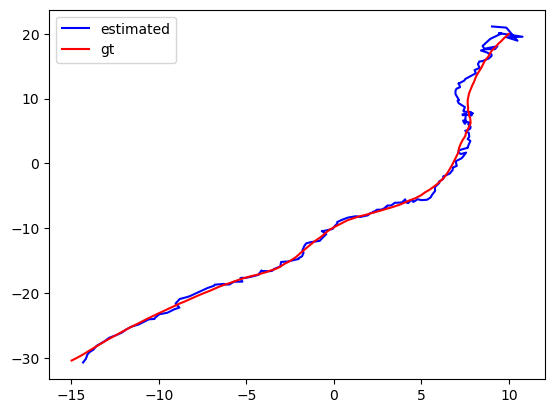

In [110]:
x0 = np.hstack([observations[0, :], [0, 0]]).reshape(-1, 1)
P0 = np.eye(x0.shape[0]) * 100

xarr, chi2, carr = kalman_filter(x0, P0, Q, R)

quantiles = get_quantiles()
print(chi2, quantiles)

plt.plot(xarr[:, 0], xarr[:, 1], color='b', label='estimated')
plt.plot(track[:, 0], track[:, 1], color='red', label='gt')

plt.legend()
plt.show()

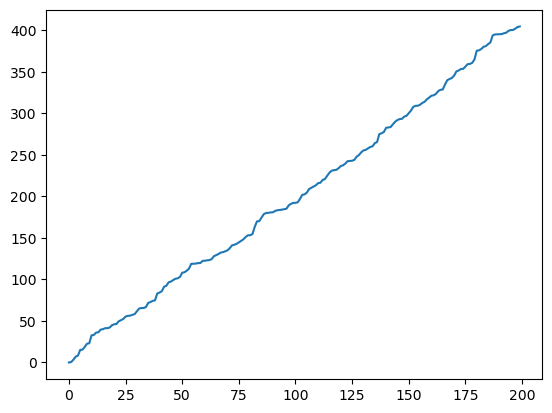

In [112]:
plt.plot(np.array(carr))
plt.show()

409.88057499714023 (354.6409740660825, 447.6324678308084)


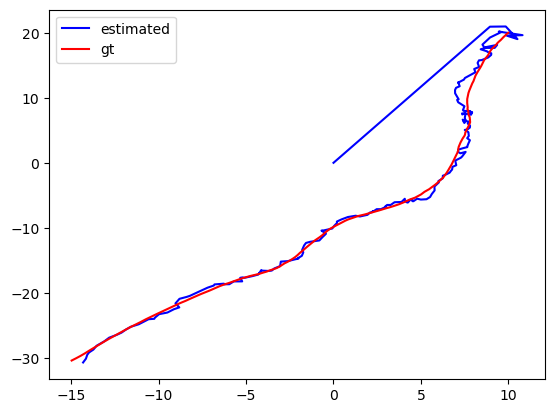

In [113]:
x0 = np.zeros((A.shape[0], 1))
P0 = np.eye(x0.shape[0]) * 100

xarr, chi2, carr = kalman_filter(x0, P0, Q, R)

quantiles = get_quantiles()
print(chi2, quantiles)

plt.plot(xarr[:, 0], xarr[:, 1], color='b', label='estimated')
plt.plot(track[:, 0], track[:, 1], color='red', label='gt')

plt.legend()
plt.show()

4945.263047075972 (354.6409740660825, 447.6324678308084)


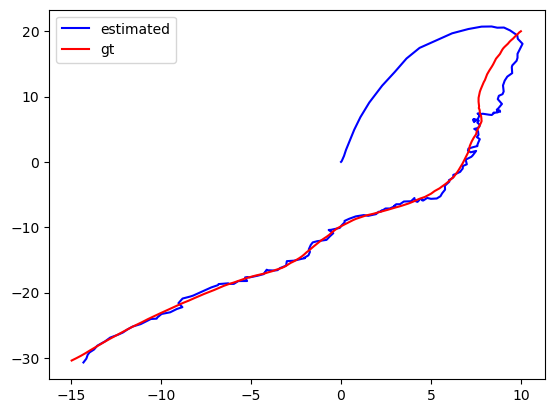

In [114]:
x0 = np.zeros((A.shape[0], 1))
P0 = np.eye(x0.shape[0]) * 1e-3

xarr, chi2, carr = kalman_filter(x0, P0, Q, R)

quantiles = get_quantiles()
print(chi2, quantiles)

plt.plot(xarr[:, 0], xarr[:, 1], color='b', label='estimated')
plt.plot(track[:, 0], track[:, 1], color='red', label='gt')

plt.legend()
plt.show()

218.17366898913738 (354.6409740660825, 447.6324678308084)


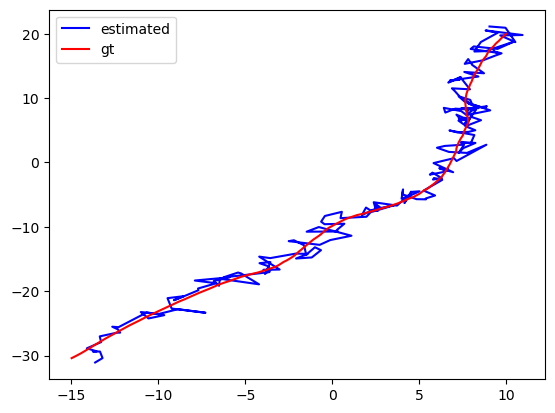

In [90]:
Q_wrong = np.eye(Q.shape[0])
R_wrong = np.eye(R.shape[0])

x0 = np.hstack([observations[0, :], [0, 0]]).reshape(-1, 1)
P0 = np.eye(x0.shape[0]) * 100

xarr, chi2 = kalman_filter(x0, P0, Q_wrong, R_wrong)

quantiles = get_quantiles()
print(chi2, quantiles)

plt.plot(xarr[:, 0], xarr[:, 1], color='b', label='estimated')
plt.plot(track[:, 0], track[:, 1], color='red', label='gt')

plt.legend()
plt.show()